## This.ipynb file provides examples for training and testing different models in the Intra-Subject scenario

In [1]:
import warnings
warnings.filterwarnings("ignore")
import os
# import sys
# path = os.path.join(os.getcwd())
# sys.path.append(path) 
# os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'
# os.environ.get('PATH', '')
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from train.trainTest import ModelTrainTest
from tensorflow.python.client import device_lib
from IPython.display import clear_output as clear
%matplotlib inline
# print(plt.style.available)
plt.style.use('Solarize_Light2')
print('tf.version:',tf.__version__,'keras.version:',keras.__version__)
print('is_gpu_available: ', tf.config.list_physical_devices('GPU'))
print('gpu_device_name: ', tf.test.gpu_device_name())
# 列出所有的本地机器设备
local_device_protos = device_lib.list_local_devices()
[print(x) for x in local_device_protos if x.device_type == 'GPU'] # 只打印GPU设备
# Specify Gpu-0 for model training
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
# Allocate minimum memory based on actual usage
# gpus = tf.config.list_physical_devices('GPU')
# for gpu in gpus:
#     tf.config.experimental.set_memory_growth(gpu, True)

tf.version: 2.10.0 keras.version: 2.10.0
is_gpu_available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
gpu_device_name:  /device:GPU:0
name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3660578816
locality {
  bus_id: 1
  links {
  }
}
incarnation: 8905503206293829448
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"
xla_global_id: 416903419


In [2]:
"""parameters settings"""
attention = 'SA' # One of ['None', 'SE', 'SA'].
withTransfer = False
trainPlot = False
ReduceLR = True
EarlyStop = True
saveModelHistory = True
savePredictResult = True
savePlotResult = True

Intra-Subject model training and testing of: model-Sinc-BiLSTM, subject-10N

========================================2023-11-15 02:36:32========================================
===============第 1==3 次训练=================
targetData: (1107, 320, 5) targetMotionLabel: (1107,)
Successfully building model: Sinc-BiLSTM-SA
model.compile：
Start model training: 
Epoch 1/1500
25/25 [==============================] - 9s 106ms/step - loss: 2848.9473 - PredictOutput_loss: 2847.0867 - ClassOutput_loss: 1.8605 - PredictOutput_R2_Score: -1.8859 - PredictOutput_mae: 42.8842 - ClassOutput_accuracy: 0.4070 - val_loss: 3005.5266 - val_PredictOutput_loss: 3004.4373 - val_ClassOutput_loss: 1.0892 - val_PredictOutput_R2_Score: -1.7558 - val_PredictOutput_mae: 43.6718 - val_ClassOutput_accuracy: 0.5618 - lr: 1.0000e-04
Epoch 2/1500
25/25 [==============================] - 1s 51ms/step - loss: 2829.2600 - PredictOutput_loss: 2827.6995 - ClassOutput_loss: 1.5606 - PredictOutput_R2_Score: -1.8715 - PredictOutput

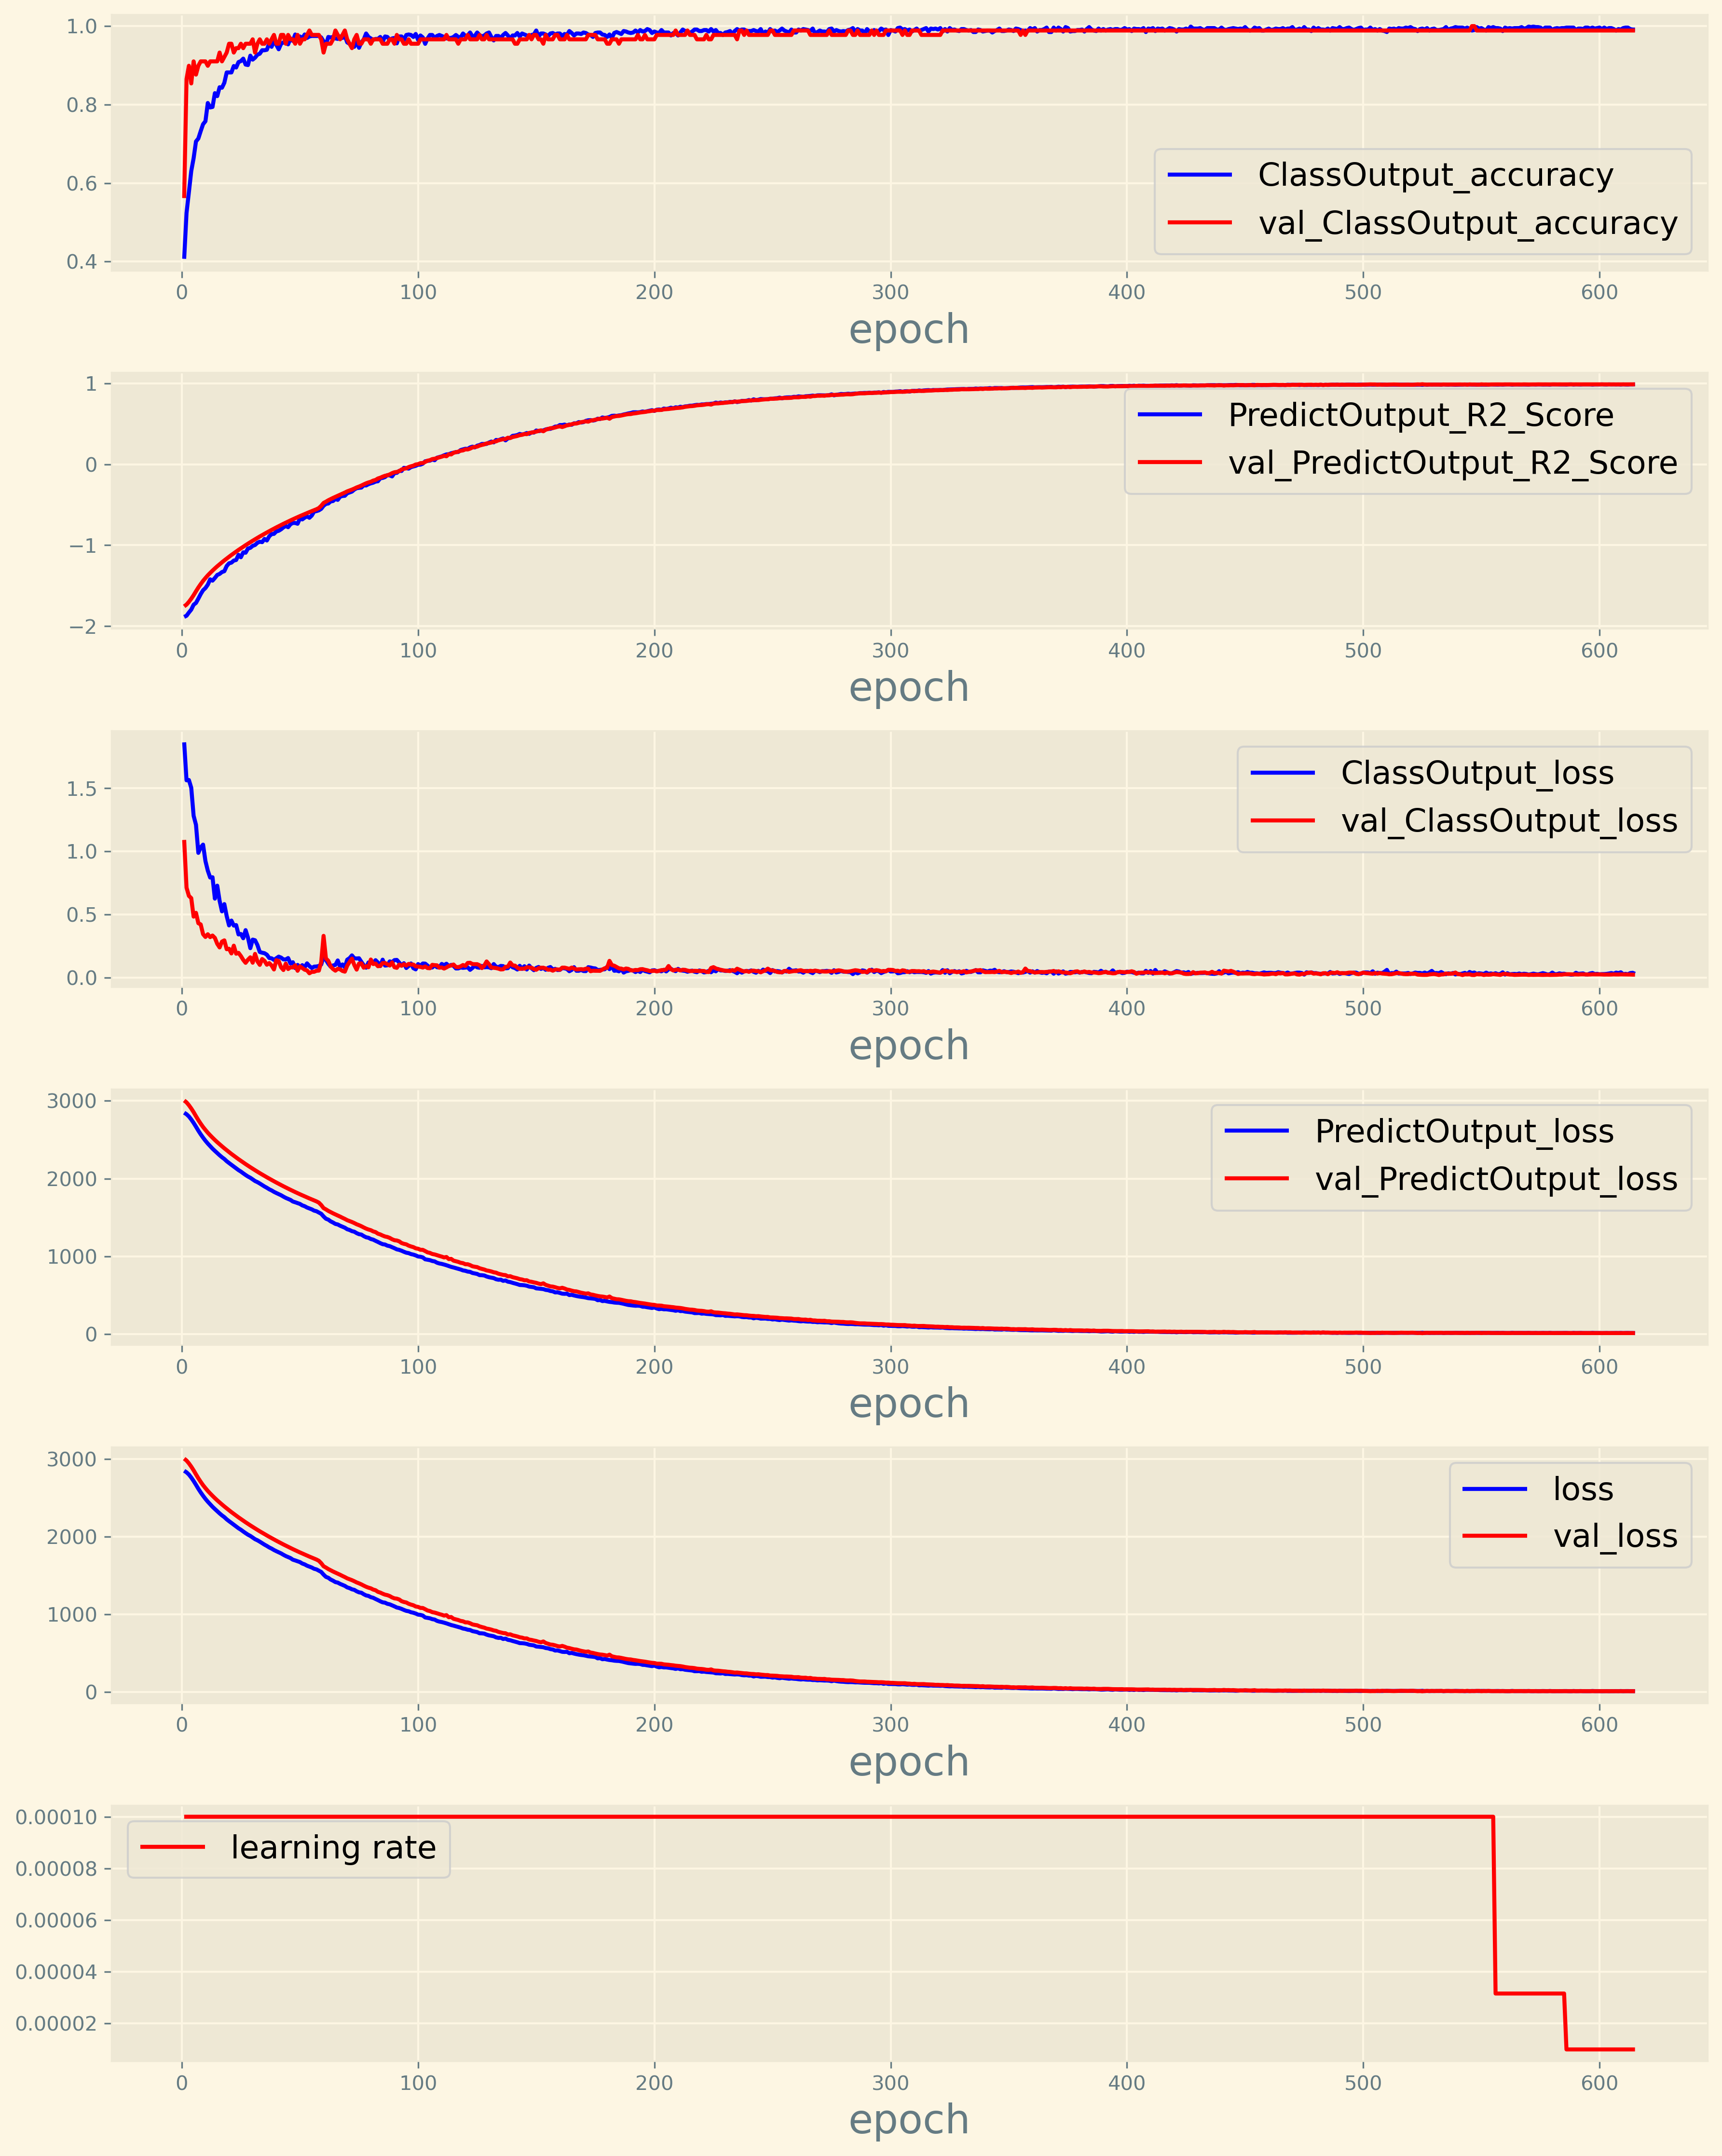

(1107, 64) (1107, 64)


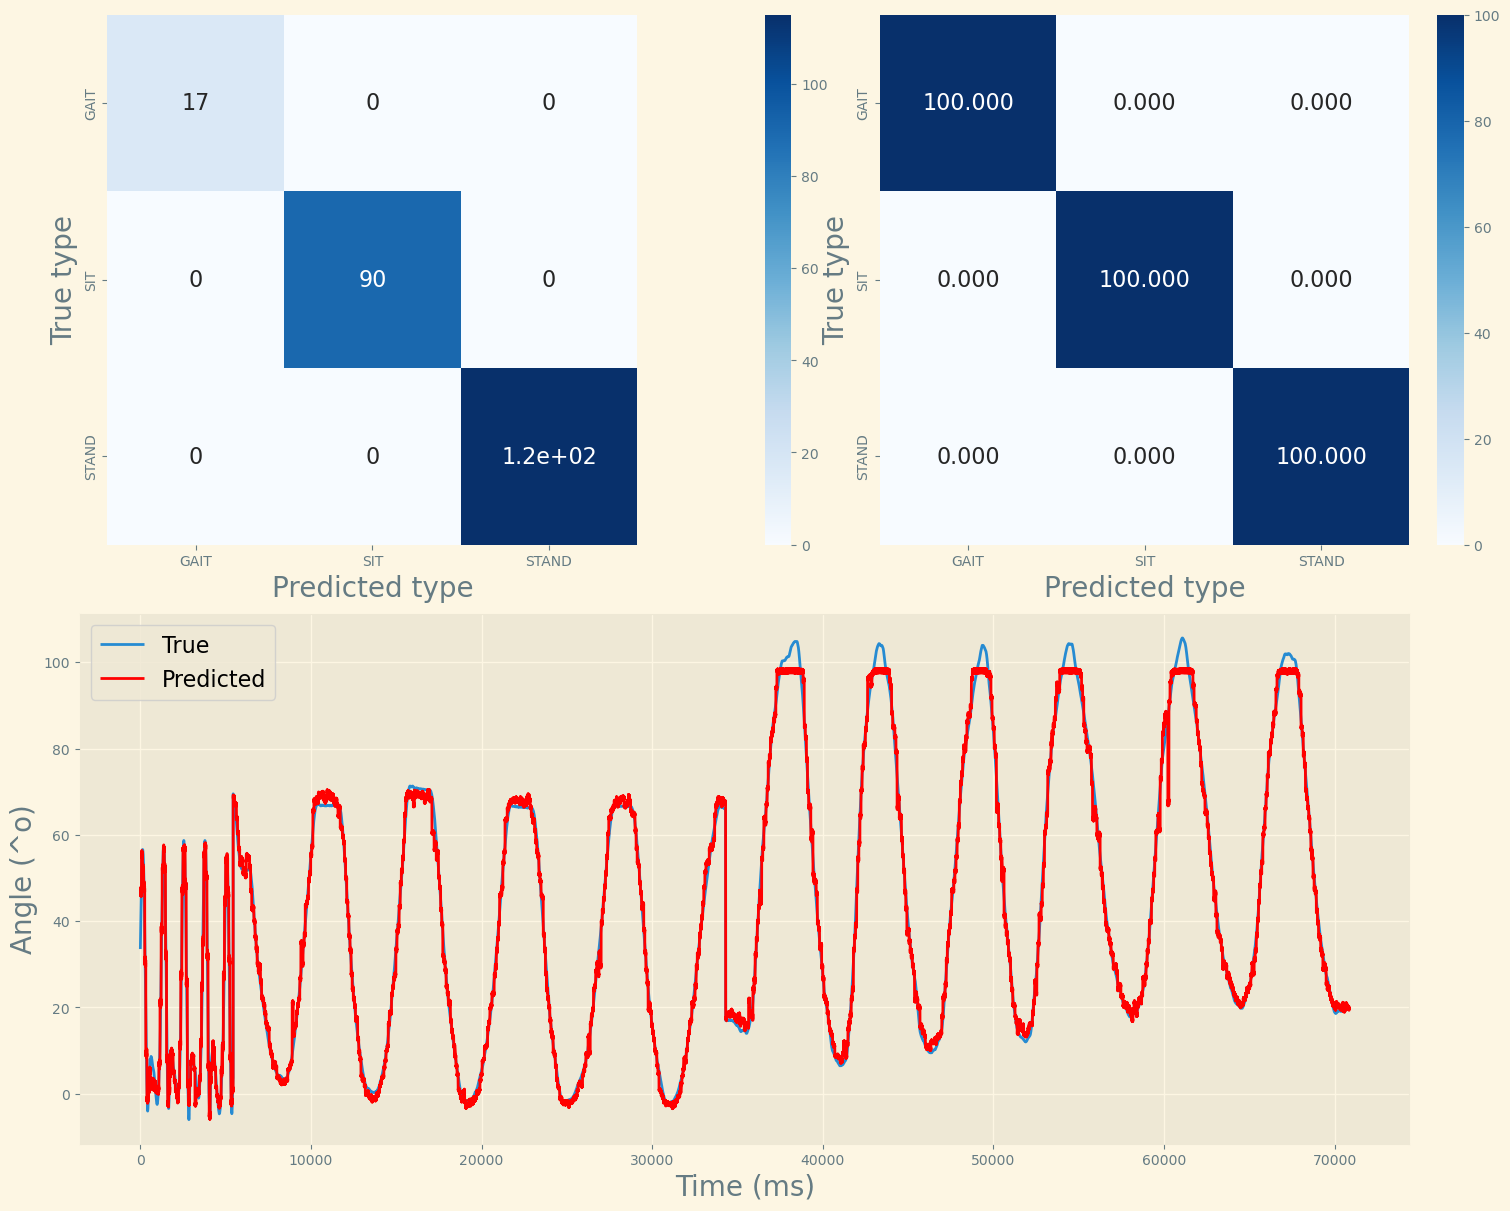

accuracy：100.000, precision：100.000, recall：100.000, specificity：100.000, npv：100.000, f1：100.000
r2：0.989, mse：11.145, rmse：3.338, mae：2.441

========================================2023-11-15 02:48:23========================================
===============第 2==3 次训练=================
targetData: (1107, 320, 5) targetMotionLabel: (1107,)
Successfully building model: Sinc-BiLSTM-SA
model.compile：
Start model training: 
Epoch 1/1500
25/25 [==============================] - 9s 124ms/step - loss: 2977.3831 - PredictOutput_loss: 2975.7192 - ClassOutput_loss: 1.6639 - PredictOutput_R2_Score: -1.9745 - PredictOutput_mae: 44.1430 - ClassOutput_accuracy: 0.4661 - val_loss: 2960.2844 - val_PredictOutput_loss: 2959.3694 - val_ClassOutput_loss: 0.9151 - val_PredictOutput_R2_Score: -2.0679 - val_PredictOutput_mae: 44.6374 - val_ClassOutput_accuracy: 0.8090 - lr: 1.0000e-04
Epoch 2/1500
25/25 [==============================] - 1s 58ms/step - loss: 2957.5647 - PredictOutput_loss: 2956.1042 - ClassOut

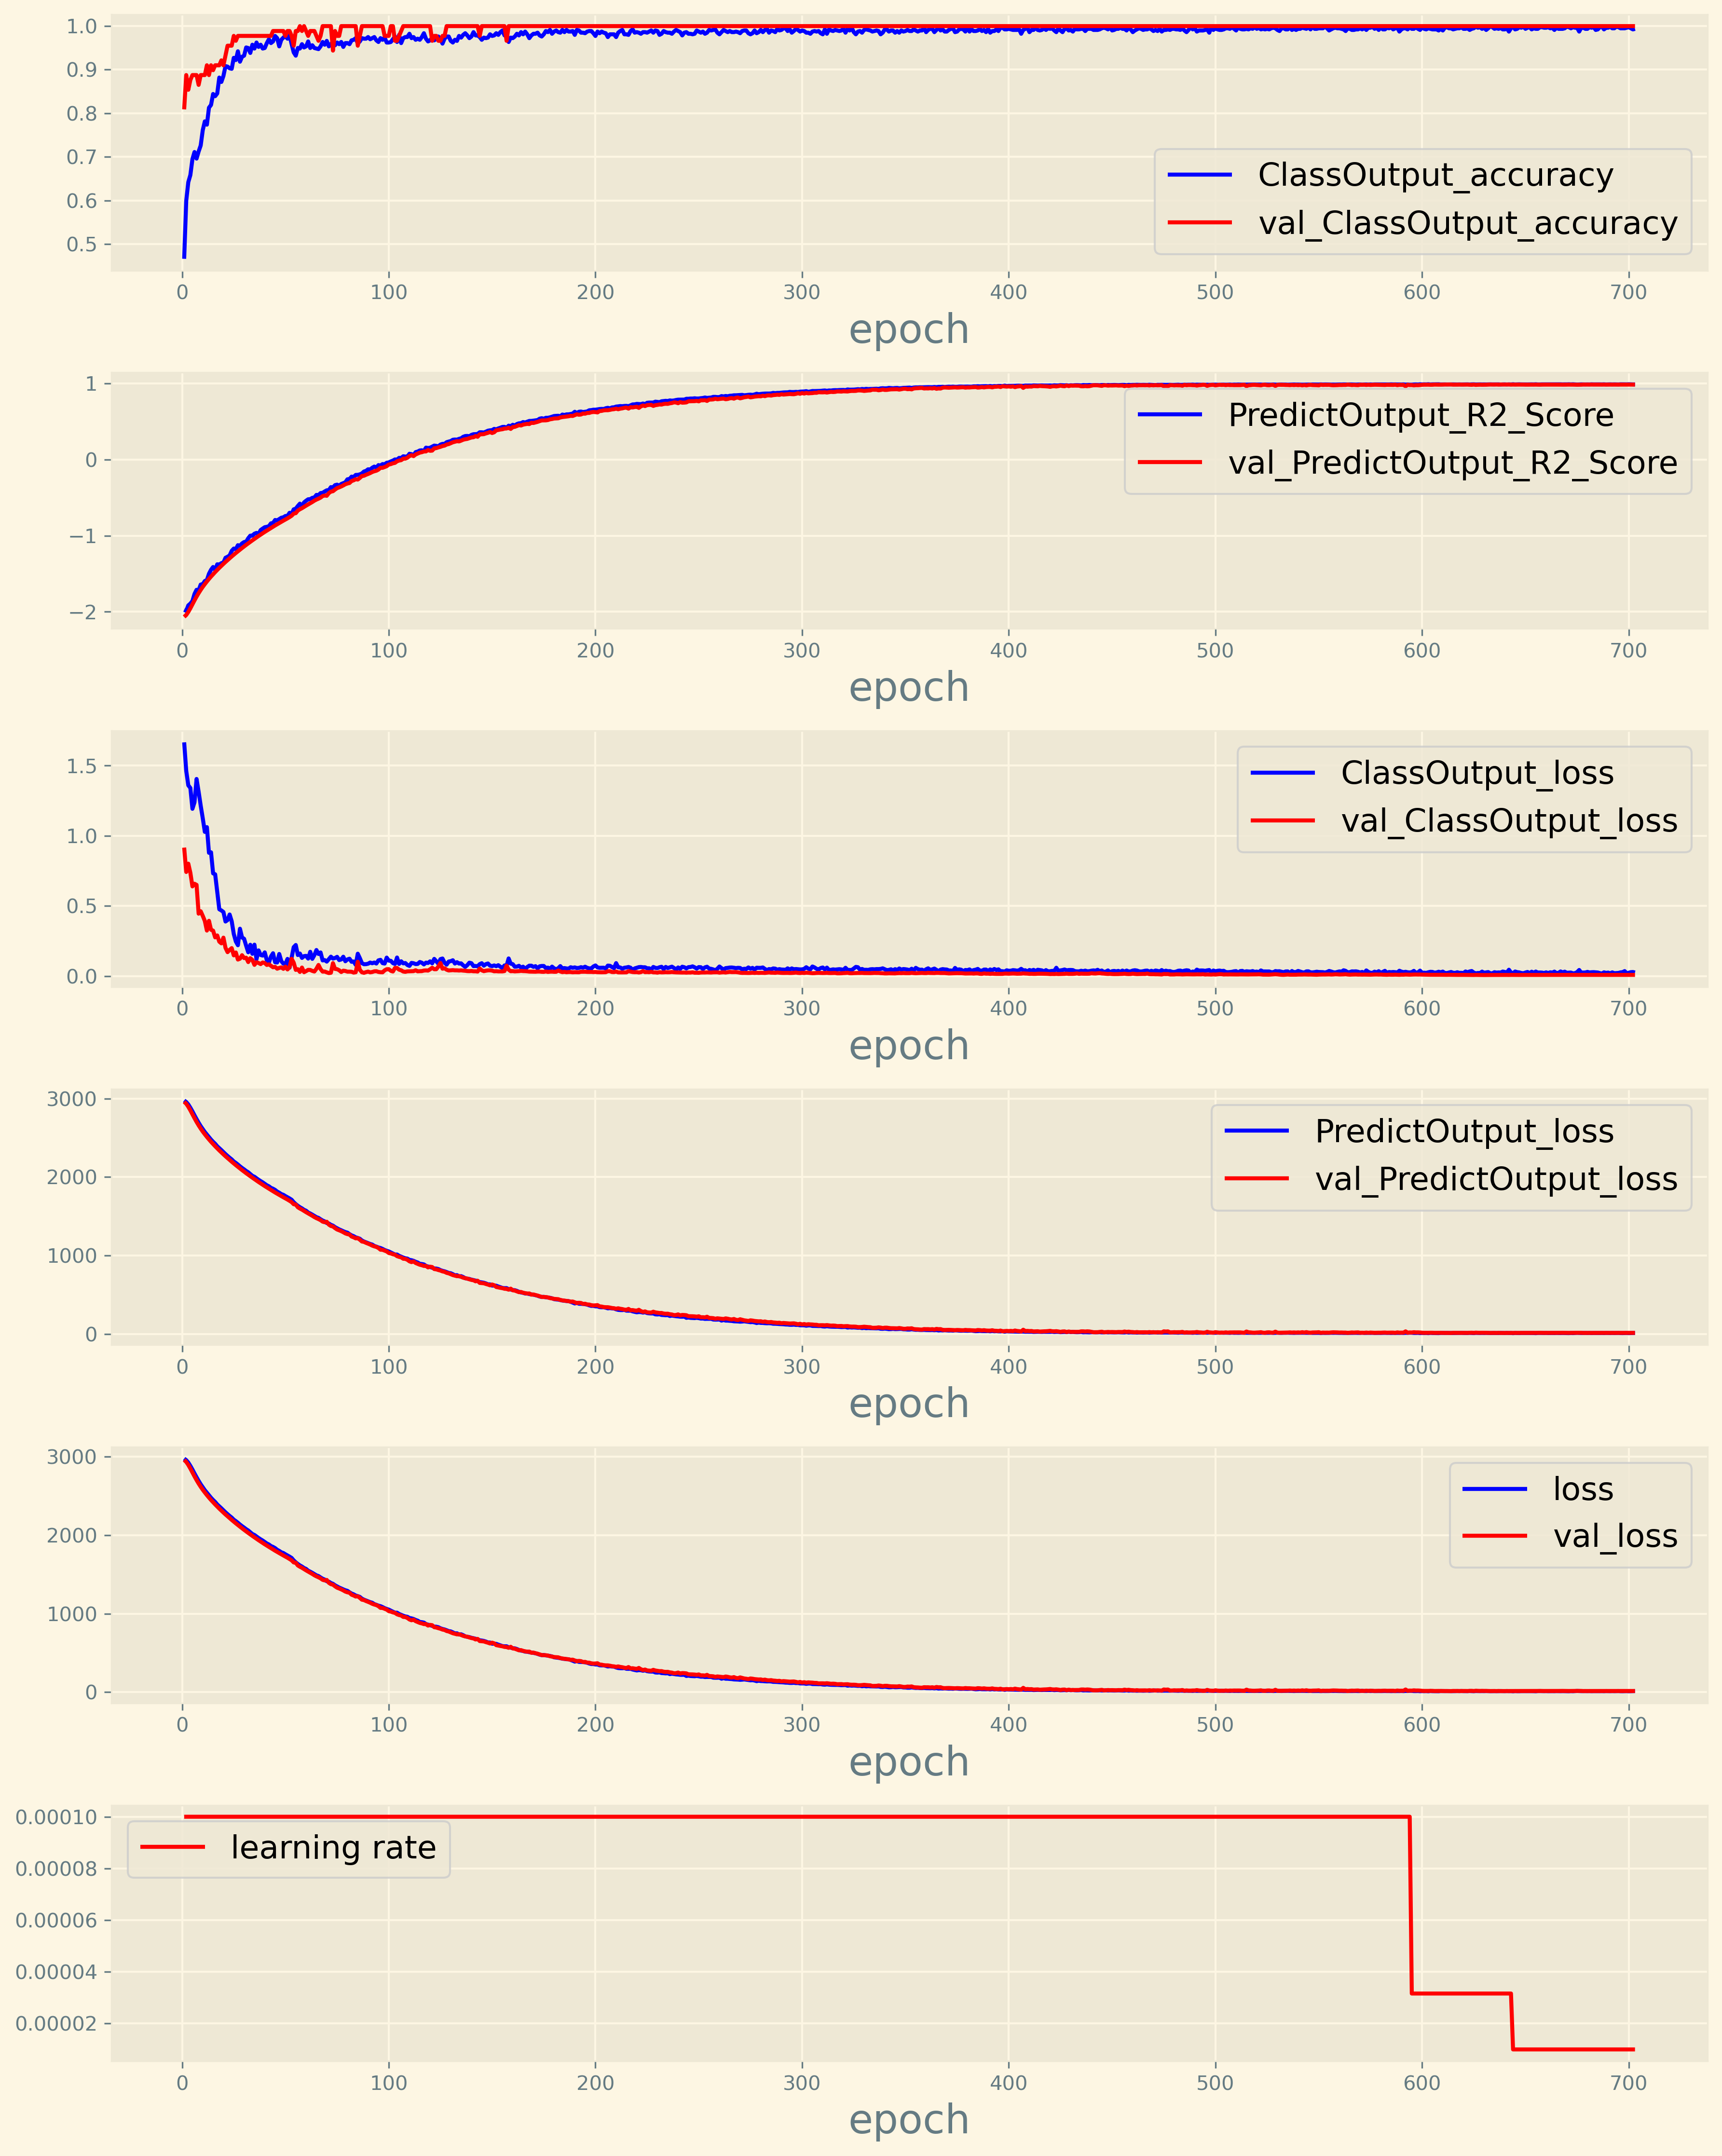

(1107, 64) (1107, 64)


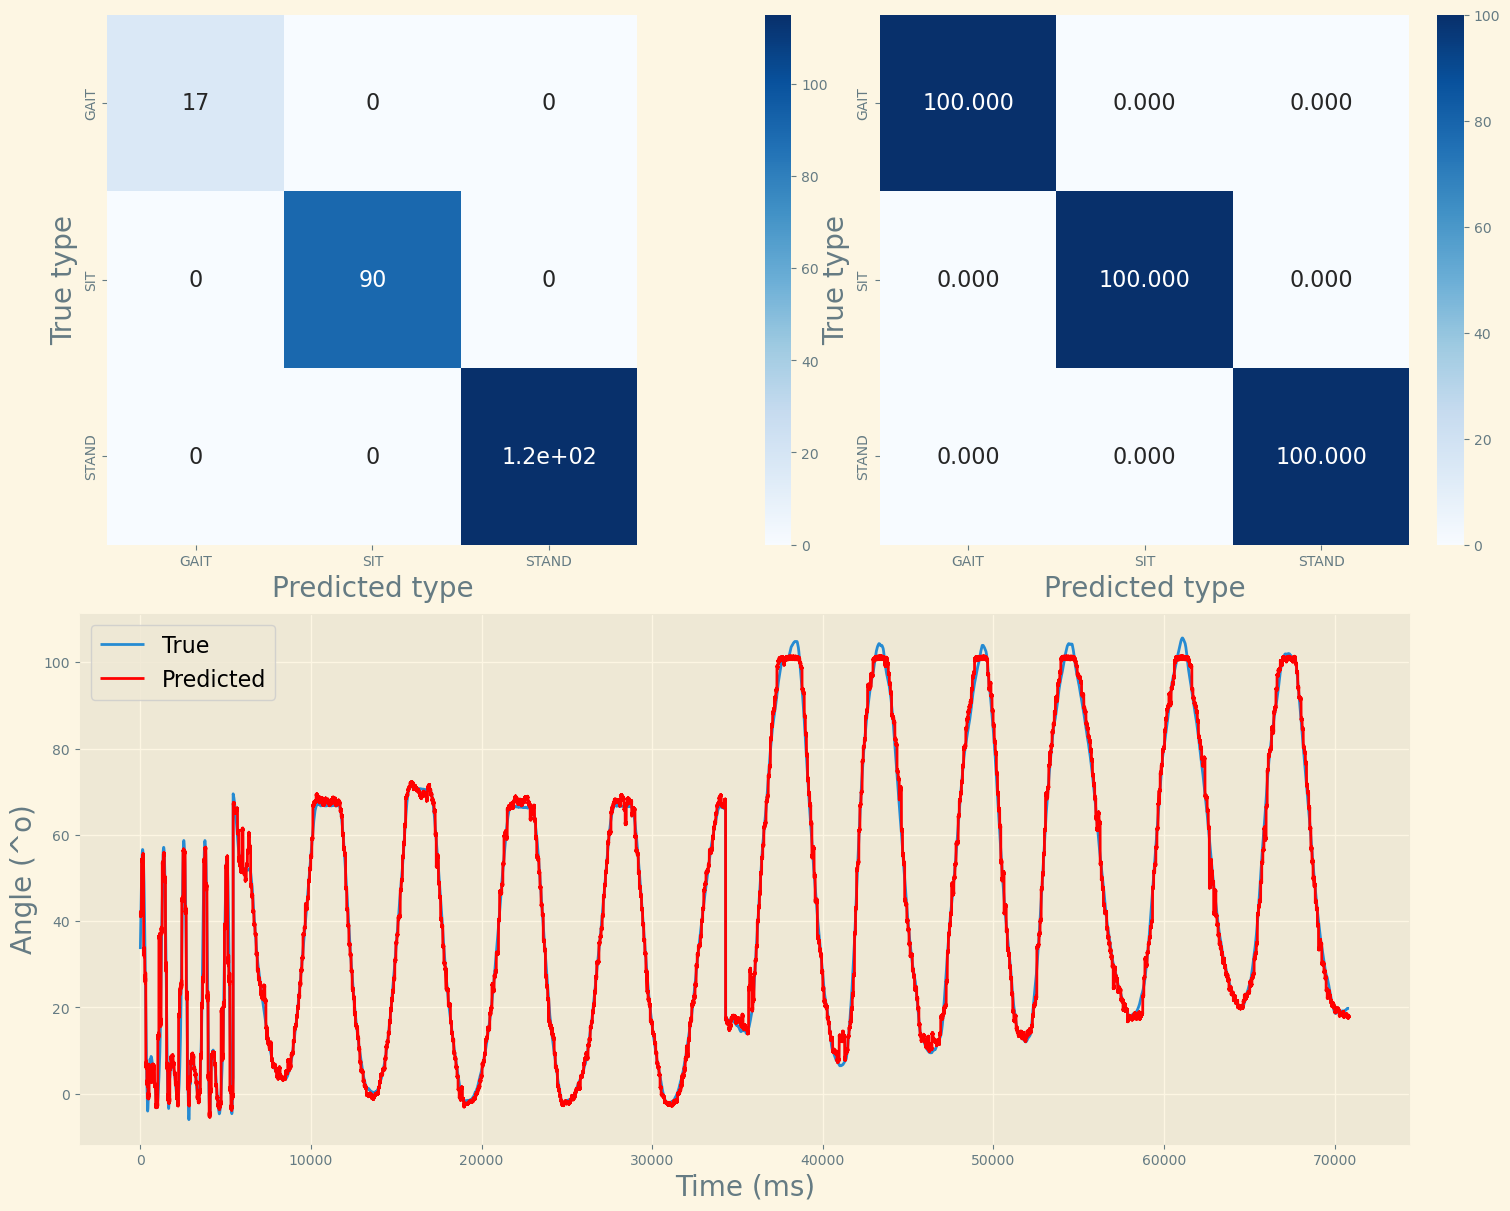

accuracy：100.000, precision：100.000, recall：100.000, specificity：100.000, npv：100.000, f1：100.000
r2：0.981, mse：18.923, rmse：4.350, mae：2.706

========================================2023-11-15 03:02:41========================================
===============第 3==3 次训练=================
targetData: (1107, 320, 5) targetMotionLabel: (1107,)
Successfully building model: Sinc-BiLSTM-SA
model.compile：
Start model training: 
Epoch 1/1500
25/25 [==============================] - 10s 115ms/step - loss: 2898.5930 - PredictOutput_loss: 2896.7942 - ClassOutput_loss: 1.7988 - PredictOutput_R2_Score: -1.9847 - PredictOutput_mae: 43.4630 - ClassOutput_accuracy: 0.4284 - val_loss: 3097.0039 - val_PredictOutput_loss: 3095.8323 - val_ClassOutput_loss: 1.1718 - val_PredictOutput_R2_Score: -2.1947 - val_PredictOutput_mae: 46.2239 - val_ClassOutput_accuracy: 0.6067 - lr: 1.0000e-04
Epoch 2/1500
25/25 [==============================] - 1s 57ms/step - loss: 2878.2468 - PredictOutput_loss: 2876.7334 - ClassOu

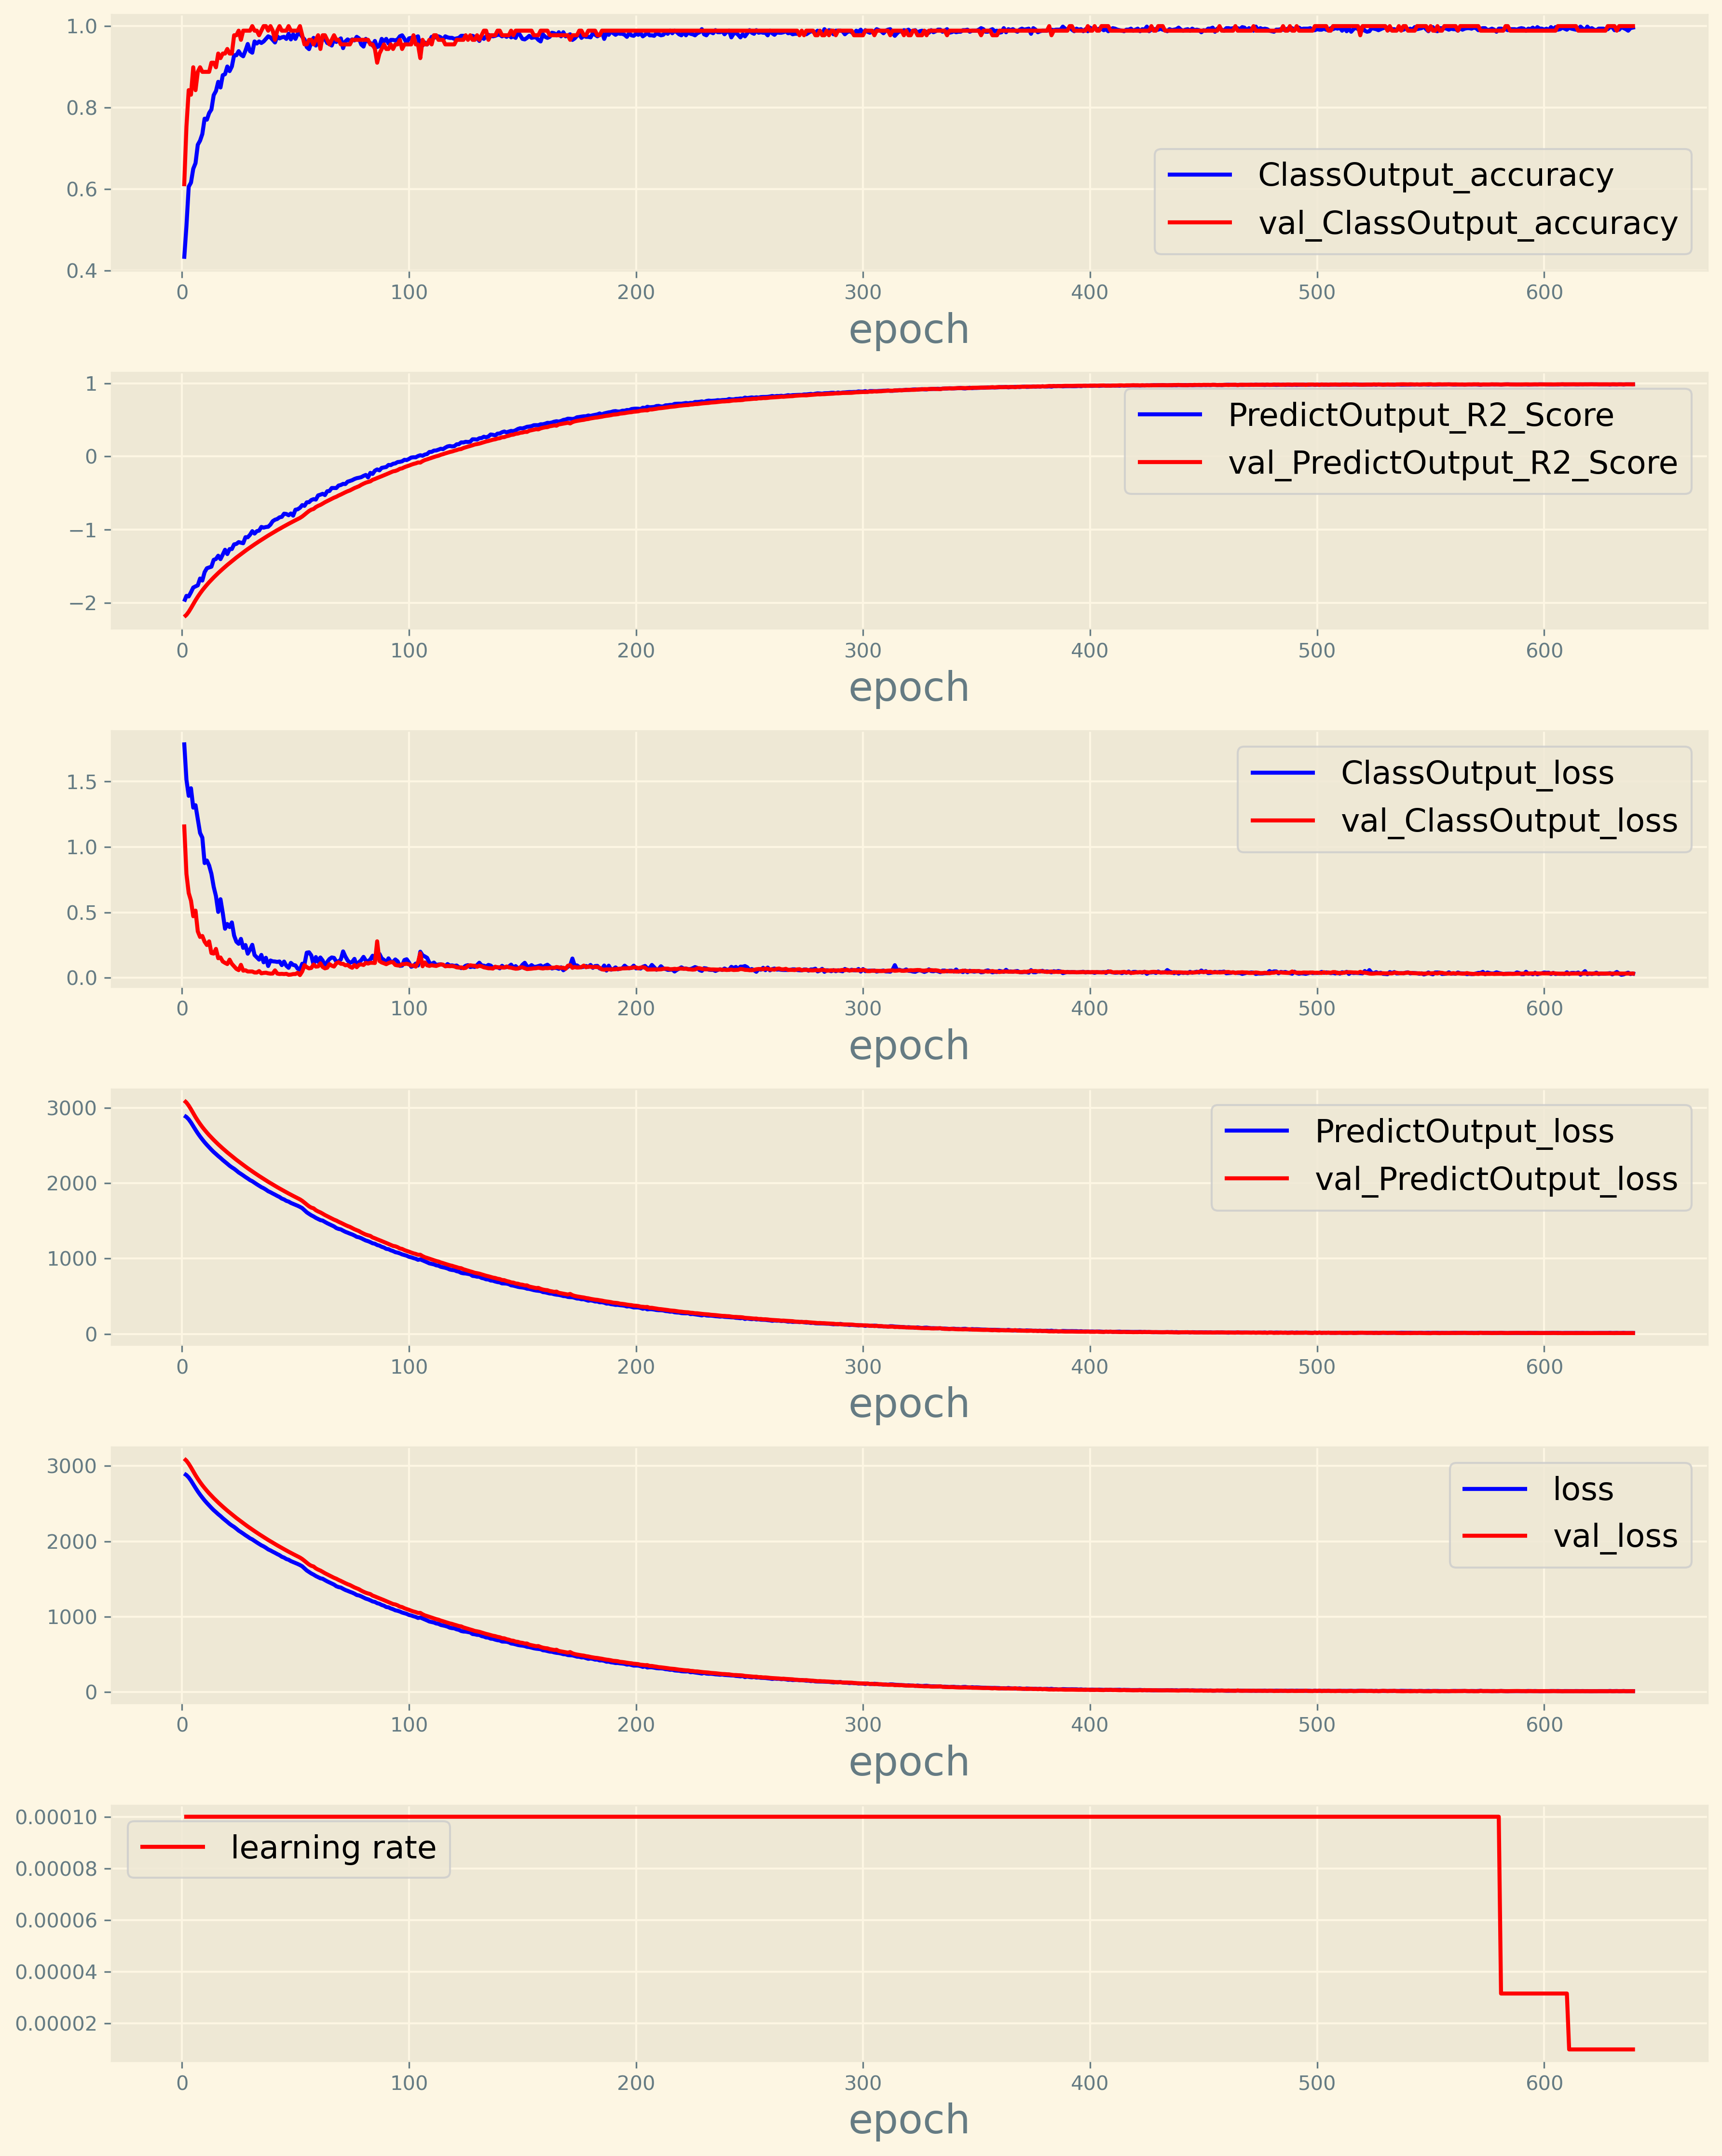

(1107, 64) (1107, 64)


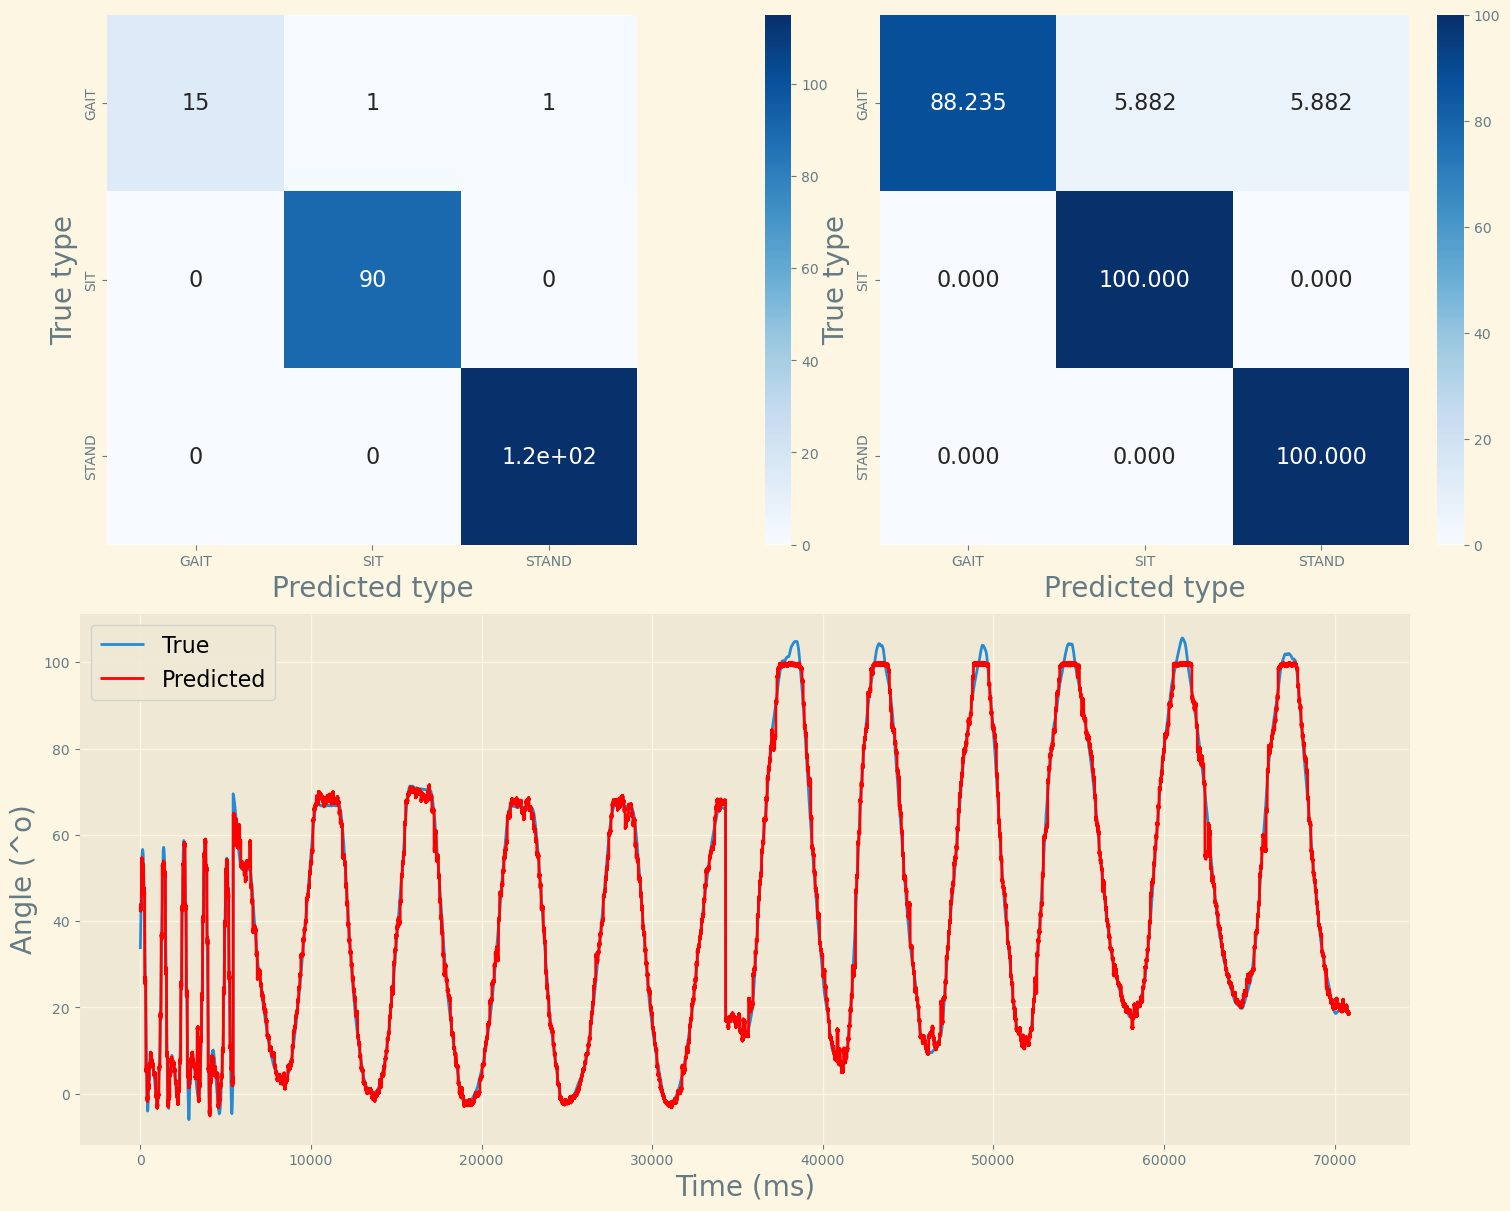

accuracy：99.099, precision：99.346, recall：96.078, specificity：99.436, npv：99.678, f1：97.588
r2：0.989, mse：12.205, rmse：3.494, mae：2.574
Mean and standard deviation of the test results of 3 experiments:
accuracy  =  99.700 / std  =  0.425
precision  =  99.782 / std  =  0.308
recall  =  98.693 / std  =  1.849
specificity  =  99.812 / std  =  0.266
npv  =  99.893 / std  =  0.152
f1  =  99.196 / std  =  1.137
r2  =  0.987 / std  =  0.004
mse  =  14.091 / std  =  3.444
rmse  =  3.727 / std  =  0.445
mae  =  2.574 / std  =  0.108
train_time  =  768.190 / std  =  61.251


In [3]:
subType = 'targetSubjects'
task = 'N-N' # When withTransfer=False, the task parameter has no effect
targetSubjects = [['1N', '2N', '3N', '4N', '5N', '6N', '7N', '8N', '9N', '10N', '11N'],
                  ['1A', '2A', '3A', '4A', '5A', '6A', '7A', '8A', '9A', '10A', '11A']]
modelTypes = ['CNN-LSTM', 'CNN-BiLSTM', 'CNN-GRU', 'CNN-BiGRU', 'CNN-TCN', 'Sinc-LSTM', 'Sinc-BiLSTM', 'Sinc-GRU', 'Sinc-BiGRU', 'Sinc-TCN']

for modelType in modelTypes:
    for j in range(len(targetSubjects)):
        for i in range(len(targetSubjects[0])):
            clear()
            targetSubject=targetSubjects[j][i]
            print('Intra-Subject model training and testing of: model-%s, subject-%s' % (modelType, targetSubject))
            train_utils = ModelTrainTest(model_type=modelType, attention=attention)
            train_utils.train(with_transfer=withTransfer, task=task, target_subject=targetSubject, sub_type=subType, 
                              train_plot=trainPlot, reduce_lr=ReduceLR, early_stop=EarlyStop, save_model_history=saveModelHistory, 
                              save_predict_result=savePredictResult, save_plot_result=savePlotResult)